In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
from dateutil import parser
from dateutil.relativedelta import relativedelta

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model

# reflect the tables

base = automap_base()

base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found

base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table

measurement = base.classes.measurement
station = base.classes.station

In [9]:
# Create our session (link) from Python to the DB

session = Session(engine)
session

# Exploratory Climate Analysis

In [10]:
# x Design a query to retrieve the last 12 months of precipitation data and plot the results
# x Calculate the date 1 year ago from the last data point in the database
# x Perform a query to retrieve the data and precipitation scores
# x Save the query results as a Pandas DataFrame and set the index to the date column
# x Sort the dataframe by date
# x Use Pandas Plotting with Matplotlib to plot the data

latest_date_query = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(latest_date_query[0])


year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
year_ago

2017-08-23


datetime.date(2016, 8, 23)

In [11]:
one_year_data = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= year_ago).all()
one_year_df = pd.DataFrame(one_year_data).set_index("date").sort_index(ascending=True)
one_year_df


,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


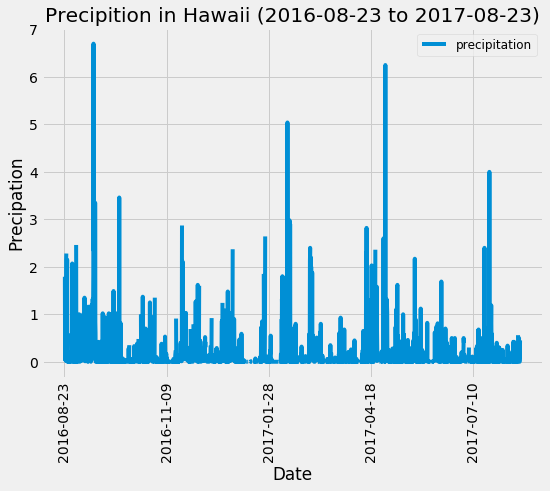

In [12]:
one_year_df.plot(figsize = (8,6), rot =90)
plt.ylabel('Precipation')
plt.xlabel('Date')
plt.title("Precipition in Hawaii (2016-08-23 to 2017-08-23)")
plt.legend(['precipitation'], fontsize=12)
plt.show()

###### Use Pandas to calcualte the summary statistics for the precipitation data

In [16]:
# Design a query to show how many stations are available in this dataset?

prec_data = engine.execute('SELECT prcp FROM measurement')
prec_data_df = pd.DataFrame(prec_data)
prec_data_df.describe()

,0
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


In [33]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

stations = session.query(measurement.station, func.count(measurement.date)).group_by(measurement.station).\
    order_by(func.count(measurement.date).desc())
stations.all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [35]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

session.query(measurement.station, func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
    filter(measurement.station == stations[0][0]).all()

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

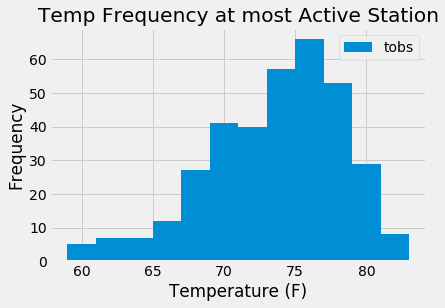

In [44]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temps = session.query(measurement.tobs).\
    filter(measurement.station == stations[0][0]).\
    filter(measurement.date >= year_ago).all()
temps_list = list(np.ravel(temps))
temps_list

plt.hist(temps_list, bins=12)
plt.xlabel("Temperature (F)")
plt.ylabel("Frequency")
plt.legend(['tobs'])
plt.title("Temp Frequency at most Active Station")
plt.show()